In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
plt.rc("font", family="Malgun Gothic")
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
def plot_dirichlet(alpha, n):
    
    def project(x):
        n1 = np.array([1, 0, 0])
        n2 = np.array([0, 1, 0])
        n3 = np.array([0, 0, 1])
        n12 = (n1 + n2) / 2
        m1 = np.array([1, -1, 0])
        m2 = n3 - n12
        m1 = m1/np.linalg.norm(m1)
        m2 = m2/np.linalg.norm(m2)
        return np.dstack([(x-n12).dot(m1), (x-n12).dot(m2)])[0]

    def project_reverse(x):
        n1 = np.array([1, 0, 0])
        n2 = np.array([0, 1, 0])
        n3 = np.array([0, 0, 1])
        n12 = (n1 + n2) / 2
        m1 = np.array([1, -1, 0])
        m2 = n3 - n12
        m1 = m1/np.linalg.norm(m1)
        m2 = m2/np.linalg.norm(m2)
        return x[:, 0][:, np.newaxis] * m1 + x[:, 1][:, np.newaxis] * m2 + n12
    
    eps = np.finfo(float).eps * 10
    X = project([[1-eps, 0, 0], [0, 1-eps, 0], [0, 0, 1-eps]])
    
    import matplotlib.tri as mtri
    
    triang = mtri.Triangulation(X[:, 0], X[:, 1], [[0, 1, 2]])
    refiner = mtri.UniformTriRefiner(triang)
    triang2 = refiner.refine_triangulation(subdiv=6)
    XYZ = project_reverse(
        np.dstack([triang2.x, triang2.y, 1-triang2.x-triang2.y])[0])
    
    pdf = sp.stats.dirichlet(alpha).pdf(XYZ.T)
    plt.tricontourf(triang2, pdf, cmap=plt.cm.bone_r)
    plt.axis('equal')
    plt.title(f'정규분포 확률변수의모수를 베이즈 추정법으로 추정한결과 : {n} 추정')
    plt.show()
mu0 = np.array([0.3, 0.5, 0.2])
np.random.seed(0)

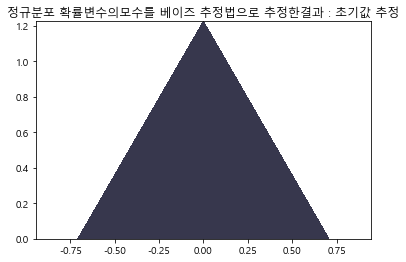

In [4]:
a0 = np.ones(3) # 아무정보도 없으므로 1:1:1
plot_dirichlet(a0, '초기값')

종류별 붓꽃의수 = [10 32  8]
1차 추정 하미퍼모수 :  [0.2  0.64 0.16]


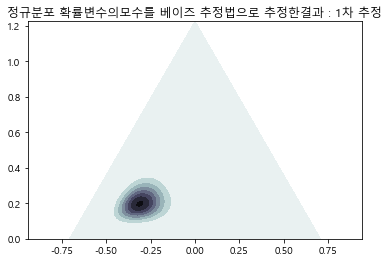

In [5]:
x1 = np.random.choice(3, 50, p=mu0)
N1 = np.bincount(x1, minlength=3)
a1 = a0 + N1

print(f"종류별 붓꽃의수 = {N1}")
print("1차 추정 하미퍼모수 : ", (a1-1)/(a1.sum()-3))

plot_dirichlet(a1, '1차')

종류별 붓꽃의수 = [24 19  7]
1차 추정 하미퍼모수 :  [0.34 0.51 0.15]


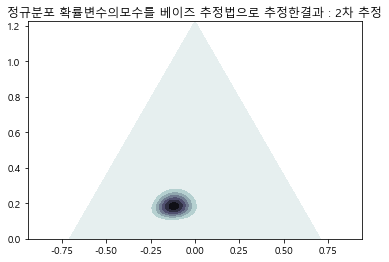

In [6]:
x2 = np.random.choice(3, 50, p=mu0)
N2 = np.bincount(x2, minlength=3)
a2 = a1 + N2

print(f"종류별 붓꽃의수 = {N2}")
print("1차 추정 하미퍼모수 : ", (a2-1)/(a2.sum()-3))

plot_dirichlet(a2, '2차')

0차 추정 : 2.11
1차 추정 : 1.98
2차 추정 : 1.96
3차 추정 : 1.95


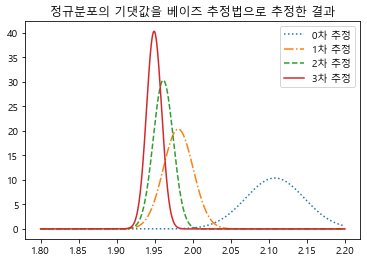

In [7]:
mu, sigma2 = 2, 4 # 실제값
mu0, sigma2_0 = 0, 1  # 초기 추정값(정보 없음)
xx = np.linspace(1.8, 2.2, 1000)

N = 100
ls = [":", "-.", "--", "-"]
for i in range(4):
    x = sp.stats.norm(mu).rvs(N)
    mu0 = (sigma2/(N*sigma2_0 + sigma2)*mu0) + ((N*sigma2_0)/(N*sigma2_0 + sigma2)*x.mean())
    sigma2_0 = 1/(1/sigma2_0 + N/sigma2)
    plt.plot(xx, sp.stats.norm(mu0, sigma2_0).pdf(xx), ls=ls[i], label=f"{i}차 추정")
    print(f"{i}차 추정 : {mu0:4.2f}")
plt.legend()
plt.title("정규분포의 기댓값을 베이즈 추정법으로 추정한 결과")
plt.show()

In [8]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
import pandas as pd
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.tail(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [10]:
sepal_length = df['sepal length (cm)']
sepal_length.mean(), sepal_length.var()

(5.843333333333335, 0.6856935123042505)

sample mean : 5.843333333333334
sample var: 0.6811222222222223


C:\Users\ghdak\anaconda3\envs\gpu_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


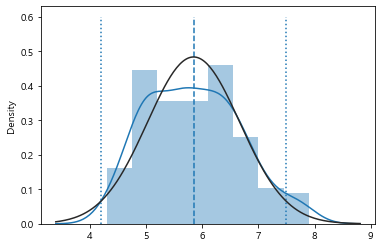

In [11]:
import seaborn as sns

iris = load_iris()
x = iris.data[:,0]
N = len(x)
mu = np.mean(x)
sigma2 = np.var(x)
print(f'sample mean : {mu}')
print(f'sample var: {sigma2}')

sns.distplot(x, kde=True, fit=sp.stats.norm)
plt.vlines(x=mu, ymin=0, ymax=0.6, ls='--')
plt.vlines(x=mu+2*np.sqrt(sigma2), ymin=0, ymax=0.6, ls=':')
plt.vlines(x=mu-2*np.sqrt(sigma2), ymin=0, ymax=0.6, ls=':')
plt.show()

In [12]:
mu0 = 1
sigma20 = 1

mu_post = (sigma2/(N*sigma20 + sigma2)*mu0) + ((N*sigma20)/(N*sigma20 + sigma2)*mu)
sigma2_post = 1 / (1/sigma20 + N/sigma2)
print('post mean:', mu_post)
print('post var:', sigma2_post)

post mean: 5.821440066849044
post var: 0.00452028901946797


C:\Users\ghdak\anaconda3\envs\gpu_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ghdak\AppData\Local\Temp/ipykernel_3476/4197481621.py:8: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  plt.plot(xx, sp.stats.norm(loc=mu_post, scale=sp.sqrt(sigma2_post)).pdf(xx))


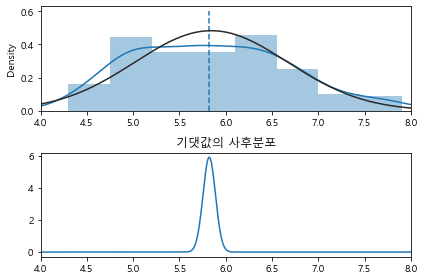

In [13]:
plt.subplot(211)
sns.distplot(x, kde=True, fit=sp.stats.norm)
plt.vlines(x=mu_post, ymin=0, ymax=0.6, ls='--')
plt.xlim(4, 8)

plt.subplot(212)
xx = np.linspace(4, 8, 1000)
plt.plot(xx, sp.stats.norm(loc=mu_post, scale=sp.sqrt(sigma2_post)).pdf(xx))
plt.title('기댓값의 사후분포')
plt.xlim(4,8)
plt.tight_layout()

plt.show()

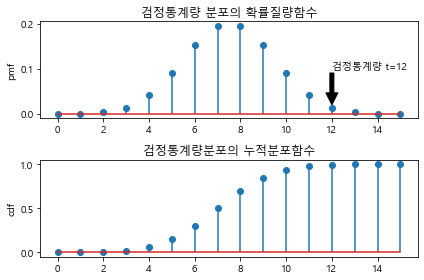

In [15]:
N = 15
mu = 0.5
rv = sp.stats.binom(N, mu)

xx = np.arange(N + 1)

plt.subplot(211)
plt.stem(xx, rv.pmf(xx))
plt.ylabel('pmf')
plt.title('검정통계량 분포의 확률질량함수')
black = {'facecolor' : 'black'}
plt.annotate('검정통계량 t=12', xy=(12, 0.02), xytext=(12,0.1), arrowprops=black)

plt.subplot(212)
plt.stem(xx, rv.cdf(xx))
plt.ylabel('cdf')
plt.title('검정통계량분포의 누적분포함수')

plt.tight_layout()
plt.show()

In [16]:
2 * (1-rv.cdf(12-1))

0.03515625

In [19]:
N = 20
mu = 0.5
rv = sp.stats.binom(N, mu)
(1-rv.cdf(11-1))

0.41190147399902344

In [27]:
sp.stats.binom_test(65, 100)

0.0035176417229701587

In [28]:
sp.stats.binom_test(49, 100)

0.9204107626128211

In [30]:
N = 100
mu_0 = 0.35
np.random.seed(0)
x = sp.stats.bernoulli(mu_0).rvs(N)
sum(x)

31

In [41]:
sp.stats.binom_test(31, 100, p=0.35)

0.463239159738974

In [64]:
sp.stats.binom_test(2, 10) # 0,1,9,10

0.109375

In [65]:
sp.stats.binom_test(459, 1000)  # 459-541

0.01038813156615577

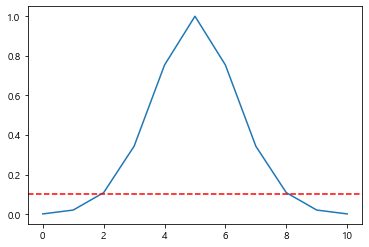

In [75]:
xx = np.arange(0,11)
yy = [sp.stats.binom_test(xx[i], 10) for i in range(len(xx))]
plt.plot(xx, yy)
plt.axhline(y=0.1, ls='--', color='r')
plt.show()

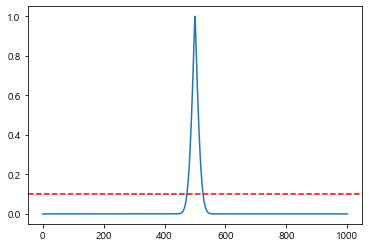

In [76]:
xx = np.arange(0,1001)
yy = [sp.stats.binom_test(xx[i], 1000) for i in range(len(xx))]
plt.plot(xx, yy)
plt.axhline(y=0.1, ls='--', color='r')
plt.show()

In [78]:
np.where(np.array(yy) > 0.1)

(array([474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486,
        487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499,
        500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512,
        513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525,
        526], dtype=int64),)